# Initiation

In [1]:
# from atmPy.data_archives.arm import read_data
from atmPy.general import timeseries
from hagpack.projects.arm import my_products
import os
from atmPy.aerosols.size_distribution import sizedistribution
plt.style.use('hagen_default')

In [2]:
%matplotlib inline

In [3]:
def get_other_filenames(filename, others, all_files, verbose = False):
    out_dict = {}
#     print('fname_tdmaapssize :', filename)
    fname_split = os.path.split(filename)[-1].split('.')
    site = fname_split[0][:3]
#     folder = os.path.split(filename)[0]
#     print(folder)
    date = fname_split[-3]
#     print('date: ', date)
    all_that_day = all_files[np.char.find(all_files, date) > -1]

    for prod in others:
        fname = all_that_day[np.char.find(all_that_day, prod) > -1]
        if fname.shape[0] != 1:
            if verbose:
                print('no corresponding aosacsm found ... continue on %s'%date)
            return False

        else:
#             print(prod,  fname[0])
            out = {'fname': fname[0]}
            out_dict[prod] = out
    out_dict['date']= date
#     out_dict['folder'] = folder
    out_dict['site'] = site
    return out_dict

# All

## backscattering ratio

In [61]:
reload(my_products)

<module 'hagpack.projects.arm.my_products' from '/Users/htelg/prog/hagpack/hagpack/projects/arm/my_products.py'>

In [24]:
product = my_products.tdmaaps2backscatteringratio_RI1o5_1um_550nm()
product.calculate_all()

In [25]:
product = my_products.tdmaaps2backscatteringratio_RI1o5_10um_550nm()
product.calculate_all()

In [25]:
product  = my_products.tdmaaps2backscatteringratio_RIaosacsm_10um_550nm(test = False)
product.calculate_all()

In [4]:
product = my_products.tdmaaps2backscatteringratio_bc_abs_noaaaos_RI1o5_10um_550nm(test = False)
product.calculate_all()

no corresponding file found ... continue on 20100514
no corresponding file found ... continue on 20100515
no corresponding file found ... continue on 20100516
no corresponding file found ... continue on 20100517
no corresponding file found ... continue on 20100822
no corresponding file found ... continue on 20101018
no corresponding file found ... continue on 20101030
no corresponding file found ... continue on 20101031
no corresponding file found ... continue on 20110116
no corresponding file found ... continue on 20110117
no corresponding file found ... continue on 20110401
no corresponding file found ... continue on 20110402
no corresponding file found ... continue on 20110403
no corresponding file found ... continue on 20121027
no corresponding file found ... continue on 20121028
no corresponding file found ... continue on 20130615
no corresponding file found ... continue on 20140303
no corresponding file found ... continue on 20140331
no corresponding file found ... continue on 20

ValueError: /Users/htelg/data/ARM/SGP/sgpnoaaaosC1.b1.20141001.000000.nc is either not the right file format or does not fall into the enquiry specifications

In [62]:
product = my_products.tdmaaps2backscatteringratio_bc_abs_noaaaos_RIaosacsm_10um_550nm(test = False)
product.calculate_all()

no corresponding file found ... continue on 20110116
no corresponding file found ... continue on 20110117
no corresponding file found ... continue on 20110401
no corresponding file found ... continue on 20110402
no corresponding file found ... continue on 20110403
no corresponding file found ... continue on 20121027
no corresponding file found ... continue on 20121028
no corresponding file found ... continue on 20130615
no corresponding file found ... continue on 20140331


ValueError: /Users/htelg/data/ARM/SGP/sgpnoaaaosC1.b1.20141001.000000.nc is either not the right file format or does not fall into the enquiry specifications

## scattering coeff

In [ ]:
product = my_products.tdmaaps2scatteringcoeff_bc_abs_noaaaos_RIaosacsm_10um_550nm()
product.calculate_all()

In [196]:
product = my_products.tdmaaps2scatteringcoeff_bc_abs_noaaaos_RI1o5_10um_550nm()
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_bc_abs_noaaaos_RI1o5_10um_550nm.20120201.000000.cdf


In [ ]:
product = my_products.tdmaaps2scatteringcoeff_bc_ratio_0o050_RI1o5_10um_550nm()
product.calculate_all()

In [7]:
product = my_products.tdmaaps2scatteringcoeff_RI1o5_1um_550nm()
# product.calculate_new()
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RI1o5_1um_550nm.20141112.000000.cdf


In [10]:
product = my_products.tdmaaps2scatteringcoeff_RI1o5_10um_550nm()
# product.calculate_new()
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RI1o5_10um_550nm.20141112.000000.cdf


In [8]:
product = my_products.tdmaaps2scatteringcoeff_RIaosacsm_10um_550nm()
# product.calculate_new()
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm.20141112.000000.cdf


In [8]:
product = my_products.tdmaaps2scatteringcoeff_RIaosacsm_1um_550nm()
# product.calculate_new()
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm.20141112.000000.cdf


In [9]:
product = my_products.tdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_bad()
# product.calculate_new()
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_bad.20141112.000000.cdf


In [10]:
product = my_products.tdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_good()
# product.calculate_new()
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_good.20141112.000000.cdf


In [11]:
product = my_products.sgpaipfitrh2kappa_RH_85_40_tdmaapssize_RI1o5_1um_550nm_patchy()
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgpaipfitrh2kappa_RH_85_40_tdmaapssize_RI1o5_1um_550nm_patchy.20141231.000000.cdf


In [7]:
product = my_products.sgptdmahyg2kappa_avg_d200_patchy(test = False)
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmahyg2kappa_avg_d200_patchy.20141112.000000.cdf


## hygroscopicity

In [ ]:
product = my_products.tdmaapstdmahyg2fofrh_10um_hyg400_rh85v0_ioraosacsm_patchy(test = True)
product.calculate_all()

In [ ]:
product = my_products.tdmaapstdmahyg2fofrh_10um_hyg400_rh85v0_ior1o5_patchy(test = True)
product.calculate_all()

In [12]:
product = my_products.tdmaapstdmahyg2fofrh_1um_hyg400_rh85v0_ior1o5_patchy(test = True)
product.calculate_all()

In [ ]:
product = my_products.noaaaos2hygroscopicity_10um_550nm_patchy(verbose=True)
product.calculate_all()

In [ ]:
runII = my_products.noaaaos2hygroscopicity_1um_550nm_patchy(test=True)
runII.calculate_all()

# f(RH)

all fRH products can be found [here](http://localhost:8888/notebooks/prog/hagpack/hagpack/projects/arm/my%20products-fRH.ipynb)

# Kappa

## Kappa from aipfitrh

In [4]:
out = my_products.sgpaipfitrh2kappa_RH_85_40_tdmaapssize_RI1o5_1um_550nm_patchy(test=True)
out.calculate_all()

## Kappa from tdmahy

In [4]:
prod = my_products.sgptdmahyg2kappa_avg_d200_patchy(test = True)

## Kappa from acsm

In [11]:
fname = '/Users/htelg/data/ARM/SGP/sgpaosacsmC1.b1.20120301.001222.cdf'

In [12]:
out = read_data.read_cdf(fname, data_quality= 'patchy')

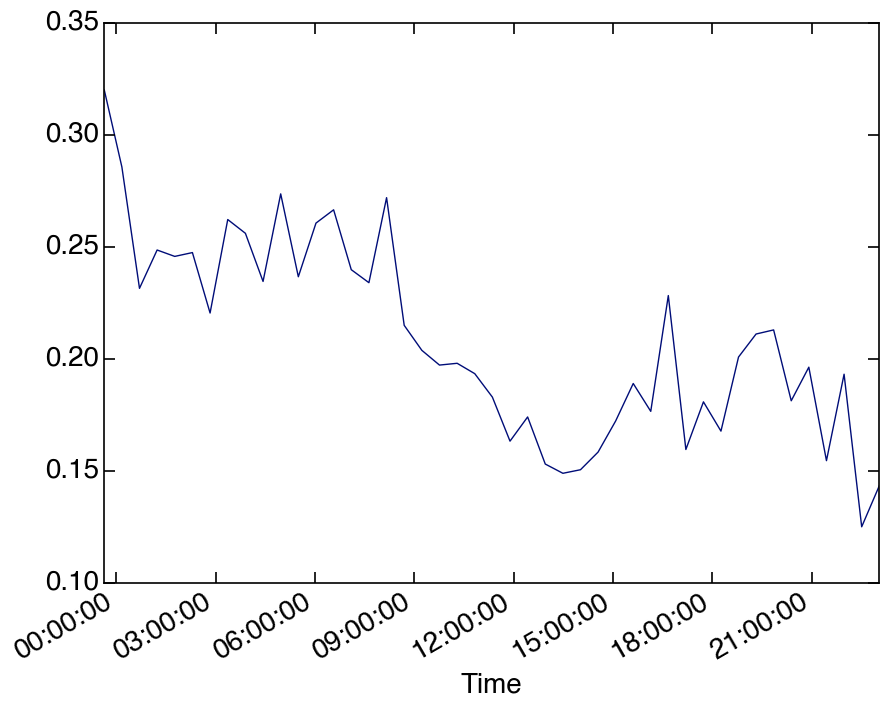

In [13]:
out.kappa.plot()

# mass from tdmaapssize and aosacsm

In [ ]:
class TdmaapsAosacsm2massconcentration(object):
    def __init__(self, data_quality = 'patchy',
        diameter_cutoff='1um',
        folder_out = '/Users/htelg/data/ARM/myproducts/SGP/',
        folder = '/Users/htelg/data/ARM/SGP/'):
        
        self.data_quality = data_quality
        self.diameter_cutoff= diameter_cutoff
        self.folder_out = folder_out
        self.folder = folder
        
    def _calculate_one(self, tdmaapssize, aosacsm, diameter_cutoff):
        if diameter_cutoff == '1um':
            dcoff = 1000
        elif diameter_cutoff == '10um':
            dcoff = 10000

        dist = tdmaapssize.size_distribution.zoom_diameter(end = dcoff)
        dist.physical_property_density = aosacsm.density
        pmc = dist.particle_mass_concentration
        return pmc
    
    def calculate_new(self, time_window = False, verbose = False):
        self._calculate_all(False)
        
    def calculate_all(self, time_window = False, verbose = False):
        self._calculate_all(True)
        
    def _calculate_all(self, overwrite, time_window = False, verbose = False):
        mass_conc_list = []
        all_files = os.listdir(self.folder)
        all_files = np.array(all_files)

        all_files_tdmaapssize = all_files[np.char.find(all_files, 'tdmaapssize') > -1]

        for e,fname_tdmaapssize in enumerate(all_files_tdmaapssize):
        #             print(fname_tdmaapssize)
            if time_window:
                if not atm_arm._is_in_time_window(fname_tdmaapssize, verbose):
                    continue

            fname_others = get_other_filenames(fname_tdmaapssize, ['aosacsm'], all_files)
            if not fname_others:
                continue

            name_addon = '%s'%(self.diameter_cutoff)
            my_prod_name = self.folder_out + '/' + fname_others['site'] + '_HT_tdmaapsmass_' + name_addon + '.' + fname_others['date'] + '.000000.cdf'

            if not overwrite:
                if os.path.isfile(my_prod_name):
                    if verbose:
                        print('product %s already exists'%my_prod_name)
                    continue
            verbose = False
            tdmaapssize = read_data.read_cdf(self.folder + fname_tdmaapssize, data_quality = self.data_quality, verbose = verbose)
            aosacsm = read_data.read_cdf(self.folder + fname_others['aosacsm']['fname'], data_quality= self.data_quality, verbose = verbose)

            mass_conc = self._calculate_one(tdmaapssize, aosacsm, diameter_cutoff=self.diameter_cutoff)

            mass_conc_list.append(mass_conc)
            mass_conc.save_netCDF(my_prod_name)

        print(my_prod_name)
        mass_conc_cat  = timeseries.concat(mass_conc_list)
        self.mass_conc_concat = mass_conc_cat.close_gaps(verbose=False)

In [ ]:
HT_tdmaapsmass_1um = TdmaapsAosacsm2massconcentration(data_quality='patchy', diameter_cutoff='1um')
HT_tdmaapsmass_10um = TdmaapsAosacsm2massconcentration(data_quality='patchy', diameter_cutoff='10um')

In [ ]:
HT_tdmaapsmass_10um.calculate_all()
HT_tdmaapsmass_1um.calculate_all()

In [ ]:
HT_tdmaapsmass_1um.mass_conc_concat.plot()

# scattering from tdmaaps and aosacsm

In [1]:
from hagpack.projects.arm import my_products

In [2]:
%matplotlib inline

In [15]:
reload(my_products)

<module 'hagpack.projects.arm.my_products' from '/Users/htelg/prog/hagpack/hagpack/projects/arm/my_products.py'>

In [14]:
product = my_products.Tdmaaps2scatteringcoeff(data_quality='good', 
                                              diameter_cutoff='1um', 
                                              wavelength=550, 
                                              refractive_index='aosacsm', 
                                              folder_out='/Users/htelg/data/ARM/myproducts/SGP/', 
                                              folder='/Users/htelg/data/ARM/SGP/', 
                                              test=False)
product.test = True
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_good.20120201.000000.cdf


## tdmaaps2scatteringcoeff_bc_ratio_0o050_RI1o5_10um_550nm

In [191]:
product = my_products.tdmaaps2scatteringcoeff_bc_ratio_0o050_RI1o5_10um_550nm(test=True)
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_bc_ratio_0o050_RI1o5_10um_550nm.20120201.000000.cdf


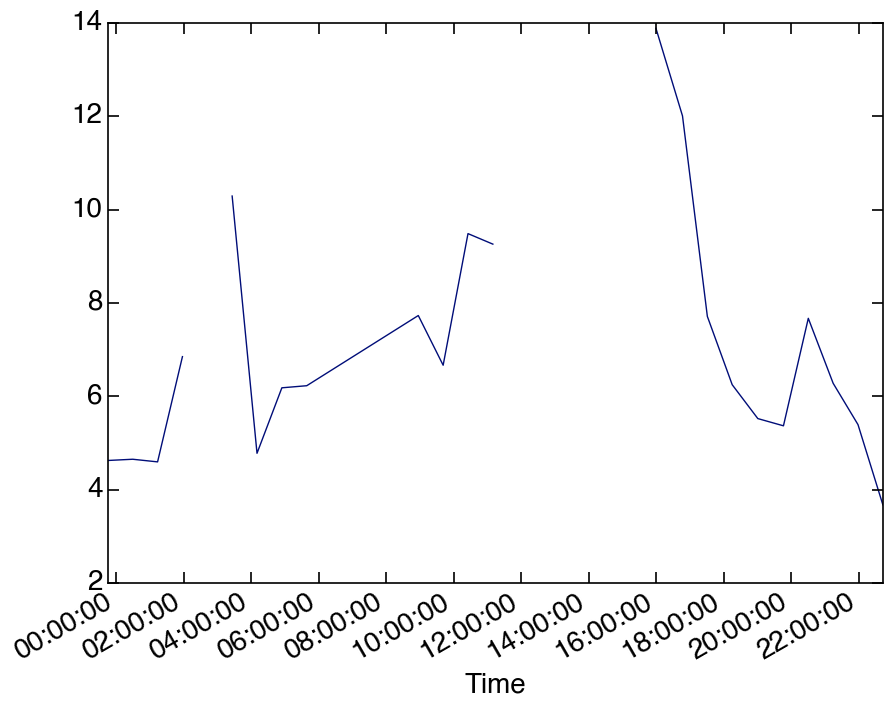

In [192]:
product.result.plot()

## tdmaaps2scatteringcoeff_bc_abs_noaaaos_RI1o5_10um_550nm

In [189]:
product = my_products.tdmaaps2scatteringcoeff_bc_abs_noaaaos_RI1o5_10um_550nm(test=True)
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_bc_abs_noaaaos_RI1o5_10um_550nm.20120201.000000.cdf


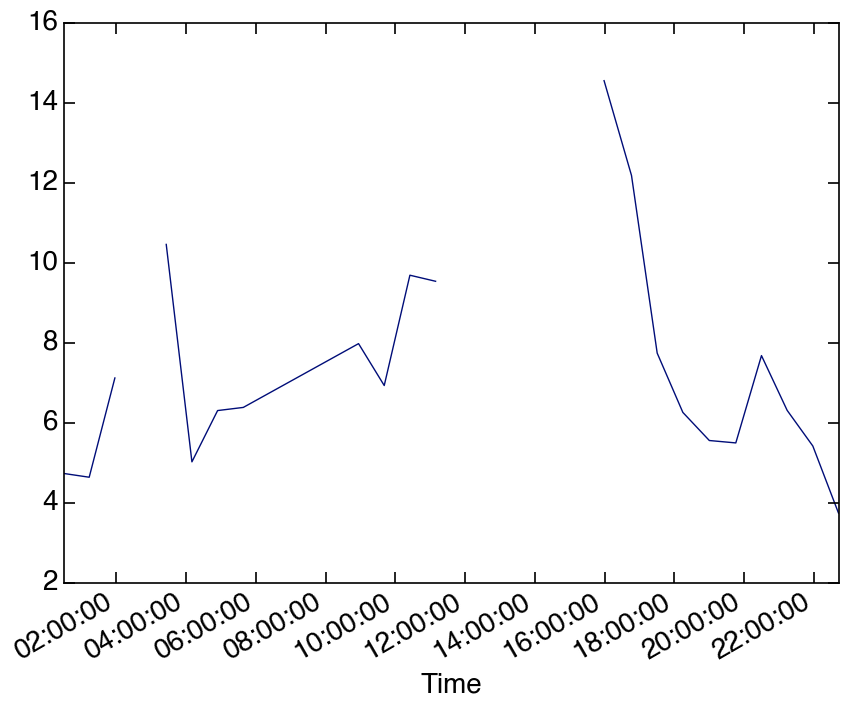

In [190]:
product.result.plot()

## tdmaaps2scatteringcoeff_IRaosacsm_1um_550nm

In [4]:
product = my_products.tdmaaps2scatteringcoeff_RIaosacsm_1um_550nm(test = True)
# product.test = True
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm.20120201.000000.cdf


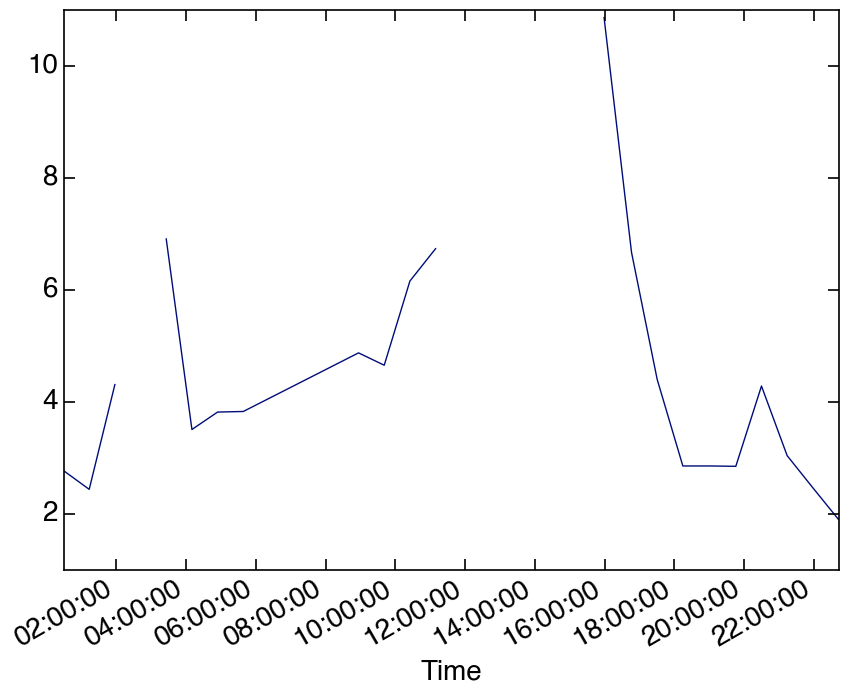

In [5]:
product.result.plot()

## tdmaaps2scatteringcoeff_IRaosacsm_10um_550nm

In [6]:
productI = my_products.tdmaaps2scatteringcoeff_RIaosacsm_10um_550nm(test=True)
# product.test = True
productI.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_10um_550nm.20120201.000000.cdf


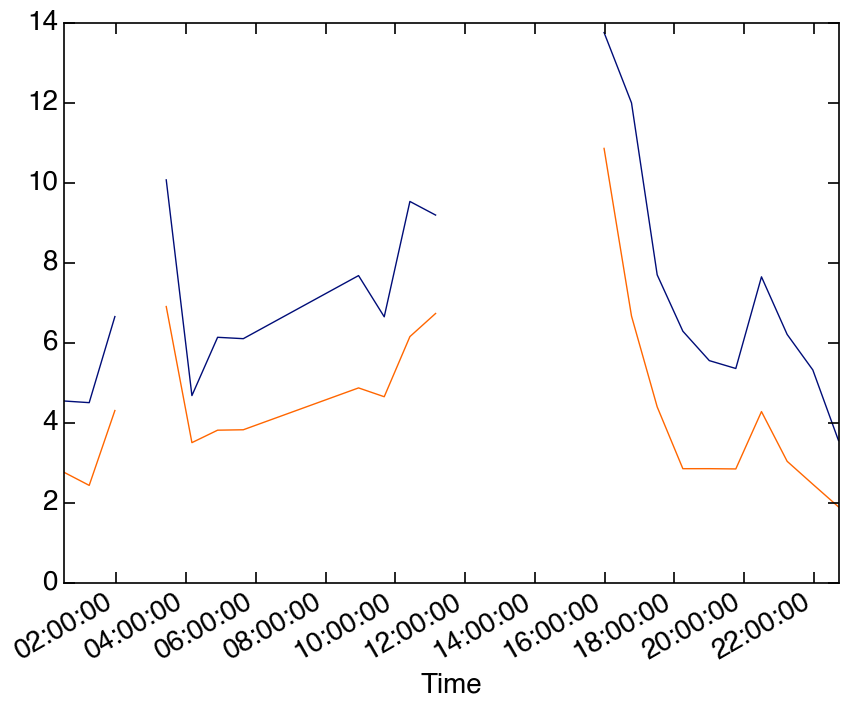

In [7]:
a = productI.result.plot()
product.result.plot(ax = a)

## tdmaaps2scatteringcoeff_IRaosacsm_1um_550nm_good

In [23]:
product = my_products.tdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_good()
# product.test = True
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_good.20141112.000000.cdf


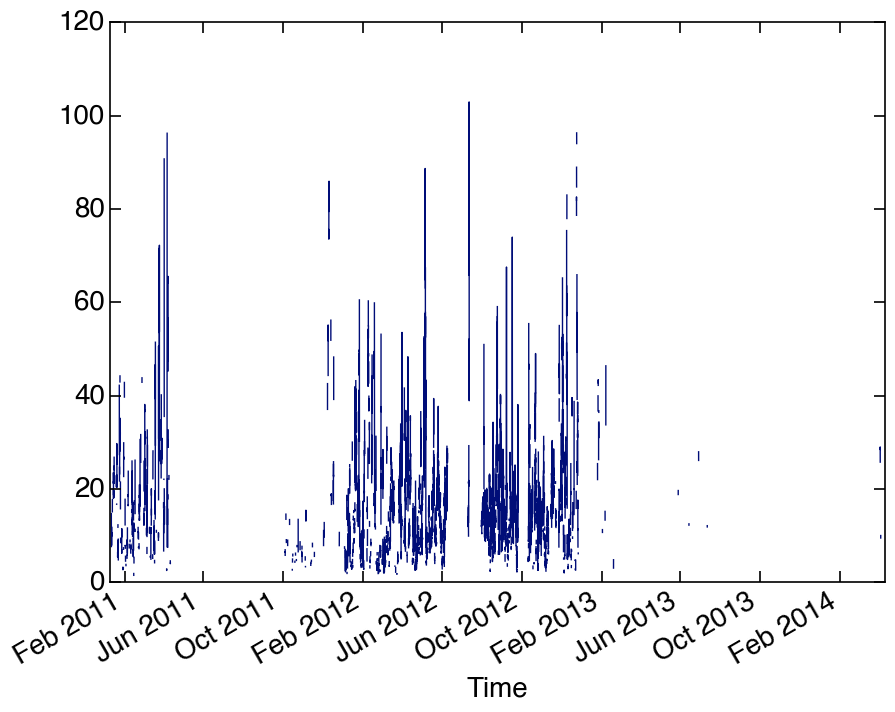

In [24]:
product.result.plot()

## tdmaaps2scatteringcoeff_IRaosacsm_1um_550nm_bad

In [25]:
product = my_products.tdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_bad()
product.test = True
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_bad.20120201.000000.cdf


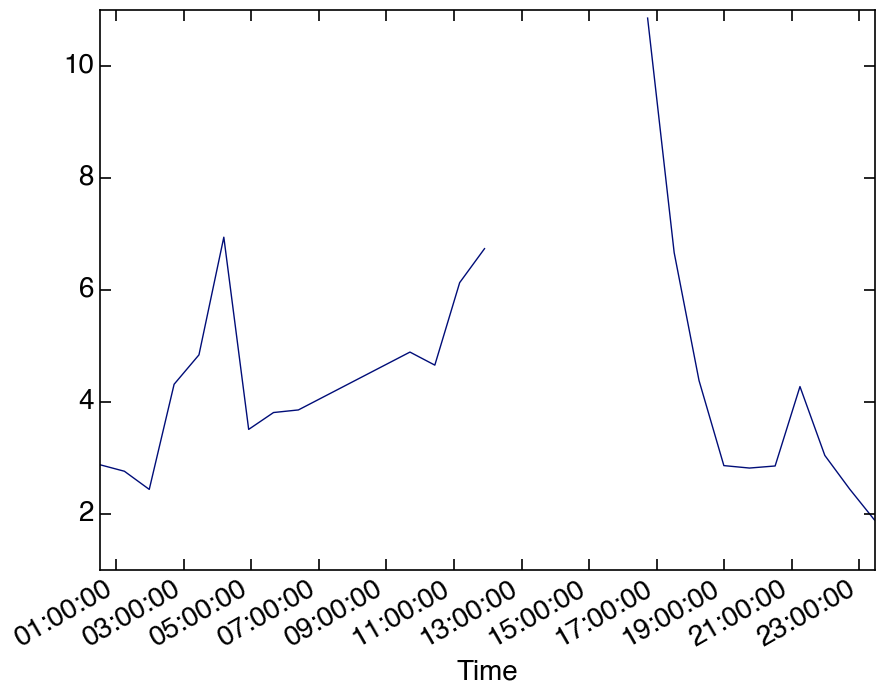

In [26]:
product.result.plot()

## tdmaaps2scatteringcoeff_RI1o5_1um_550nm

In [10]:
product = my_products.tdmaaps2scatteringcoeff_RI1o5_1um_550nm()
# product.test = True
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RI1o5_1um_550nm.20141112.000000.cdf


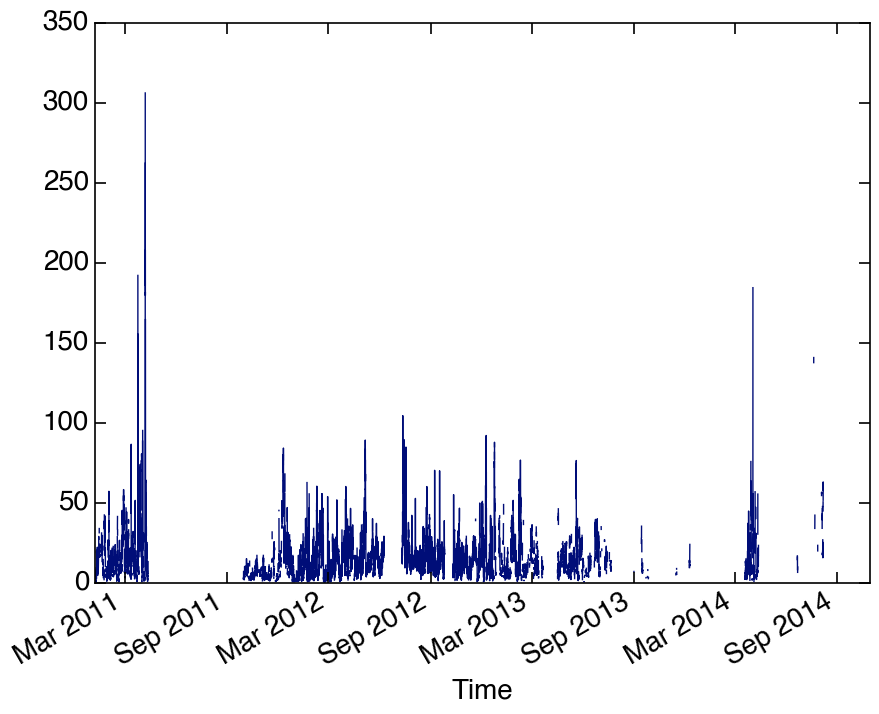

In [11]:
product.result.plot()

## tdmaaps2scatteringcoeff_RI1o5_10um_550nm

In [5]:
reload(my_products)

<module 'hagpack.projects.arm.my_products' from '/Users/htelg/prog/hagpack/hagpack/projects/arm/my_products.py'>

In [7]:
product_1um = my_products.tdmaaps2scatteringcoeff_RI1o5_1um_550nm(test=True)
# product.test = True
product_1um.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RI1o5_1um_550nm.20120201.000000.cdf


In [6]:
product_10um = my_products.tdmaaps2scatteringcoeff_RI1o5_10um_550nm(test=True)
# product.test = True
product_10um.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RI1o5_10um_550nm.20120201.000000.cdf


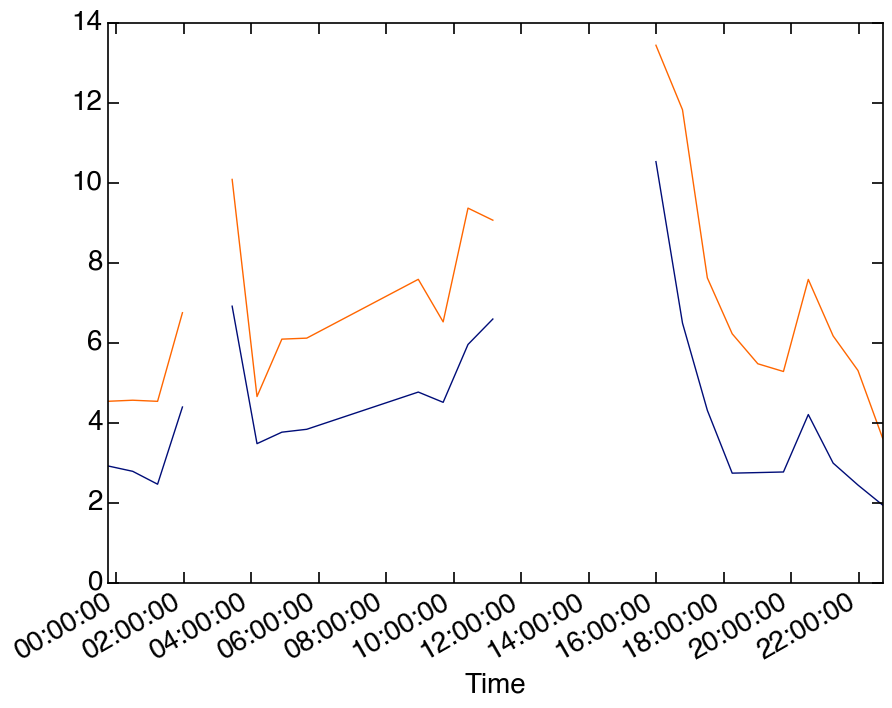

In [9]:
a = product_1um.result.plot()
product_10um.result.plot(ax = a)

## tdmaaps2scatteringcoeff_bc_abs_noaaaos_RIaosacsm_10um_550nm

In [7]:
reload(my_products)

<module 'hagpack.projects.arm.my_products' from '/Users/htelg/prog/hagpack/hagpack/projects/arm/my_products.py'>

In [8]:
out = my_products.tdmaaps2scatteringcoeff_bc_abs_noaaaos_RIaosacsm_10um_550nm(test=True)

In [5]:
out = my_products.Tdmaaps2scatteringcoeff(data_quality='patchy',
                             diameter_cutoff='10um',
                             wavelength=550,
                             refractive_index='aosacsm',
                             black_carbon={'perscribed_absorption': 'noaaaos'},
                             folder_out='/Users/htelg/data/ARM/myproducts/SGP/',
                             folder='/Users/htelg/data/ARM/SGP/',
                             test=True)

In [9]:
out.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_bc_abs_noaaaos_RIaosacsm_10um_550nm.20120201.000000.cdf


In [10]:
out.result

                     scatt_coeff_m^1
Time                                
2012-01-31 23:44:58              NaN
2012-02-01 00:29:09         4.722395
2012-02-01 01:13:21         4.614018
2012-02-01 01:57:32         7.047893
2012-02-01 02:41:42              NaN
2012-02-01 03:25:53        10.453907
2012-02-01 04:10:04         5.048741
2012-02-01 04:54:15         6.350803
2012-02-01 05:38:27         6.377325
2012-02-01 08:56:44         8.063751
2012-02-01 09:40:55         7.044799
2012-02-01 10:25:05         9.837601
2012-02-01 11:09:16         9.655031
2012-02-01 11:53:26              NaN
2012-02-01 15:59:08        14.835432
2012-02-01 16:46:20        12.341617
2012-02-01 17:30:31         7.818164
2012-02-01 18:14:40         6.323141
2012-02-01 19:00:13         5.632714
2012-02-01 19:45:46         5.566771
2012-02-01 20:29:56         7.745836
2012-02-01 21:14:06         6.350924
2012-02-01 21:58:16         5.438762
2012-02-01 22:42:27         3.706658

# hemispheric backscattering

## tdmaaps2backscatteringratio_bc_abs_noaaaos_RIaosacsm_10um_550nm

In [57]:
reload(my_products)

<module 'hagpack.projects.arm.my_products' from '/Users/htelg/prog/hagpack/hagpack/projects/arm/my_products.py'>

In [58]:
run = my_products.tdmaaps2backscatteringratio_bc_abs_noaaaos_RIaosacsm_10um_550nm(test = True)
run.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2backscatteringratio_bc_abs_noaaaos_RIaosacsm_10um_550nm.20120201.000000.cdf


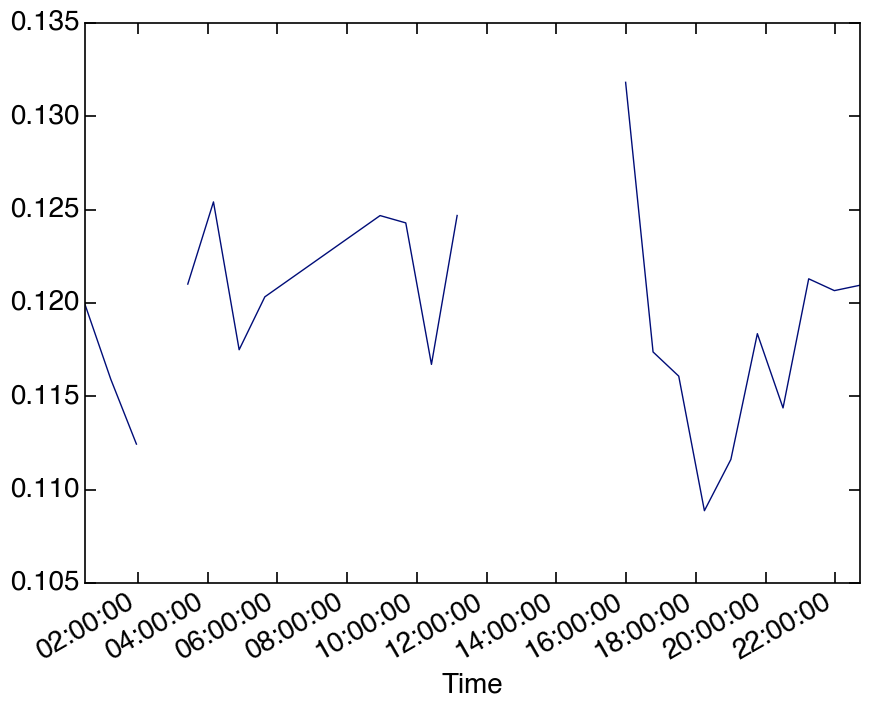

In [59]:
run.result.plot()

## tdmaaps2backscatteringratio_bc_abs_noaaaos_RI1o5_10um_550nm

In [55]:
run = my_products.tdmaaps2backscatteringratio_bc_abs_noaaaos_RI1o5_10um_550nm(test = True)
run.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2backscatteringratio_bc_abs_noaaaos_RI1o5_10um_550nm.20120201.000000.cdf


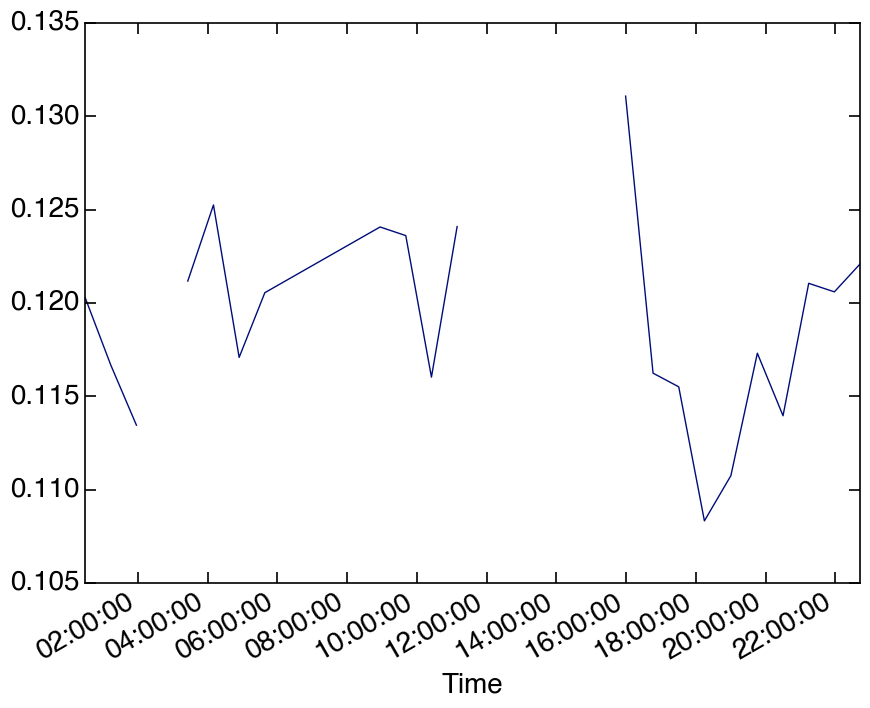

In [56]:
run.result.plot()

## sgptdmaaps2backscatteringratio_RIaosacsm_10um_550nm

In [28]:
run = my_products.tdmaaps2backscatteringratio_RIaosacsm_10um_550nm(test = True)

In [29]:
run.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2backscatteringratio_RIaosacsm_10um_550nm.20120201.000000.cdf


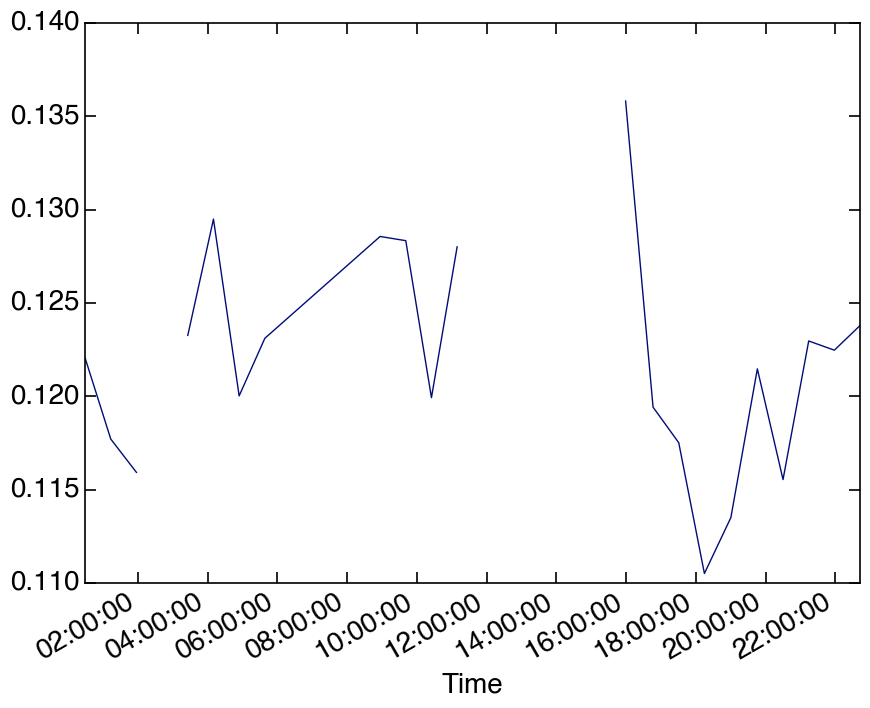

In [30]:
run.result.plot()

## tdmaaps2backscatteringratio_RI1o5_10um_550nm

In [19]:
runI = my_products.tdmaaps2backscatteringratio_RI1o5_10um_550nm(test = True)

In [20]:
runI.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2backscatteringratio_RI1o5_10um_550nm.20120201.000000.cdf


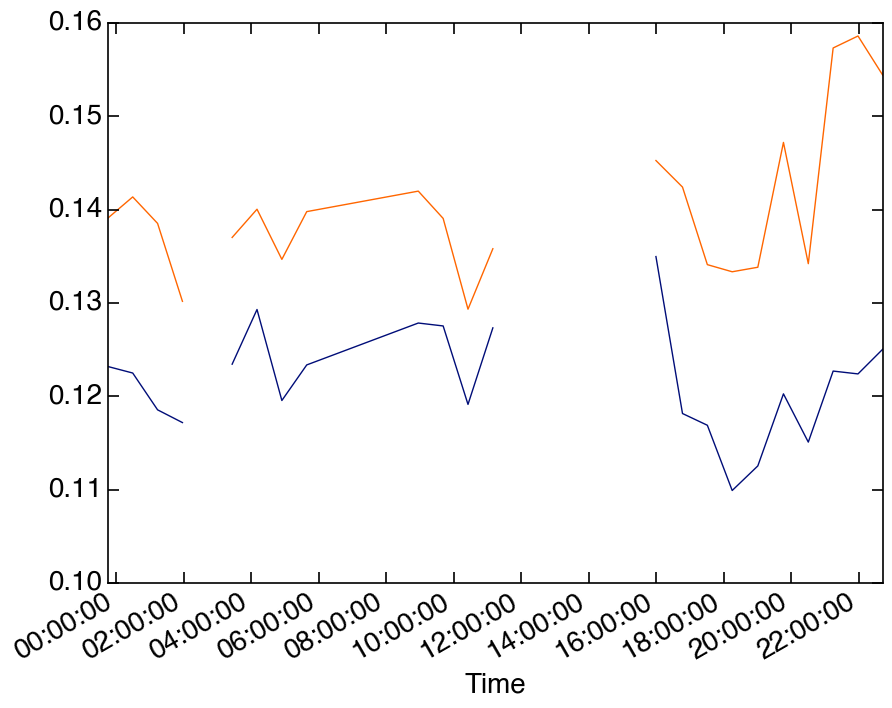

In [17]:
ax = runI.result.plot()
run.result.plot(ax = ax)

## tdmaaps2backscatteringratio_RI1o5_1um_550nm

In [21]:
run = my_products.tdmaaps2backscatteringratio_RI1o5_1um_550nm(test = True)
run.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2backscatteringratio_RI1o5_1um_550nm.20120201.000000.cdf


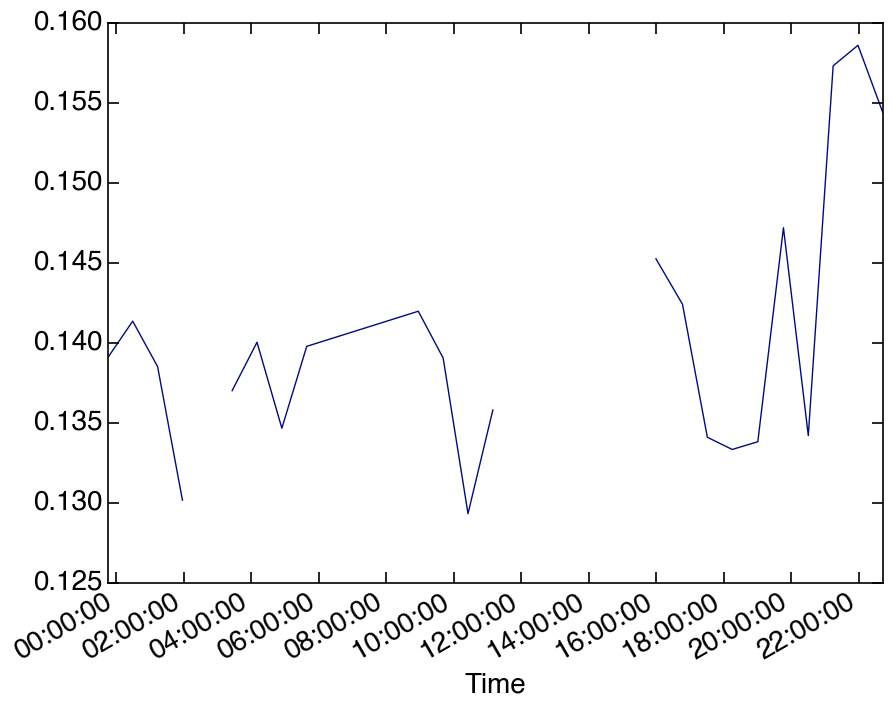

In [13]:
run.result.plot()

# Loading data

In [ ]:
from atmPy.data_archives.arm import read_data as atm_arm

In [ ]:
from hagpack.projects.arm import my_products

In [ ]:
reload(my_products)

In [ ]:
my_products.products

In [ ]:
folder = '/Users/htelg/data/ARM/myproducts/SGP/'
time_window = ('2011-10-01', '2012-01-01')
prod_name = 'HT_tdmaapshyg_1um_hyg400_rh85v40'
site = 'sgp'

In [ ]:
out = my_products.check_availability(folder,prod_name, time_window=time_window )

In [ ]:
ts_concat = my_products.load_netCDF(folder, prod_name, time_window)

In [ ]:
ts_concat.plot()

In [ ]:
def load_netCDF(folder, prod_name, time_window, site = 'sgp', verbose = False):
    all_files = os.listdir(folder)

    all_ts = []
    verbose = False
    for file in all_files:
        if not atm_arm._is_in_time_window(file, time_window, verbose):
            continue

        site_check = atm_arm._is_site(file,site,verbose)
        if not site_check:
            continue
        ts = timeseries.load_netCDF(folder + file)
        all_ts.append(ts)
    #     print('found one: ', folder + file)

    ts_concat = timeseries.concat(all_ts)
    ts_concat.data.sort_index(inplace=True)
    return ts_concat

In [ ]:
ts_concat = load_netCDF(folder, prod_name, time_window)

In [ ]:
ts_concat.plot()